In [2]:
import pandas as pd

In [3]:
arch_1 = '/Users/monzon8/Documents/Ironhack/PROYECTOS/05_EDA/vanguard-ab-test/CSV/df_final_web_data_pt_2.csv'
arch_2 = '/Users/monzon8/Documents/Ironhack/PROYECTOS/05_EDA/vanguard-ab-test/CSV/df_final_web_data_pt_1.csv'
arch_3 = '//Users/monzon8/Documents/Ironhack/PROYECTOS/05_EDA/vanguard-ab-test/CSV/df_final_experiment_clients.csv'
arch_4 = '/Users/monzon8/Documents/Ironhack/PROYECTOS/05_EDA/vanguard-ab-test/CSV/df_final_demo.csv'

# Cargo los datos en DataFrames
df_web_data_pt_2 = pd.read_csv(arch_1)
df_web_data_pt_1 = pd.read_csv(arch_2)
df_experiment_clients = pd.read_csv(arch_3)
df_demo = pd.read_csv(arch_4)

# Explorar las primeras filas de cada archivo
df_web_data_pt_2.head(), df_web_data_pt_1.head(), df_experiment_clients.head(), df_demo.head()


(   client_id             visitor_id                      visit_id  \
 0     763412  601952081_10457207388  397475557_40440946728_419634   
 1    6019349  442094451_91531546617  154620534_35331068705_522317   
 2    6019349  442094451_91531546617  154620534_35331068705_522317   
 3    6019349  442094451_91531546617  154620534_35331068705_522317   
 4    6019349  442094451_91531546617  154620534_35331068705_522317   
 
   process_step            date_time  
 0      confirm  2017-06-06 08:56:00  
 1      confirm  2017-06-01 11:59:27  
 2       step_3  2017-06-01 11:58:48  
 3       step_2  2017-06-01 11:58:08  
 4       step_1  2017-06-01 11:57:58  ,
    client_id            visitor_id                      visit_id process_step  \
 0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
 2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 3    9988021  

In [4]:
df_web_data_combinado = pd.concat([df_web_data_pt_1, df_web_data_pt_2])

In [5]:
#df_web_data_combinado.to_csv('df_web_data_combinado.csv', index=False)

In [6]:
# Métricas de interacciones por visita
interacciones = df_web_data_combinado.groupby('visit_id').agg({
    'process_step': 'count',  # Nº pasos por visita
    'date_time': ['min', 'max']  # Duración
}).reset_index()

interacciones.columns = ['visit_id', 'step_count', 'start_time', 'end_time']
interacciones['visit_duration'] = pd.to_datetime(interacciones['end_time']) - pd.to_datetime(interacciones['start_time'])


In [7]:
interacciones

,visit_id,step_count,start_time,end_time,visit_duration
0,100012776_37918976071_457913,2,2017-04-26 13:22:17,2017-04-26 13:23:09,0 days 00:00:52
1,1000165_4190026492_760066,5,2017-06-04 01:07:29,2017-06-04 01:09:50,0 days 00:02:21
2,100019538_17884295066_43909,11,2017-04-09 16:20:56,2017-04-09 16:24:58,0 days 00:04:02
3,100022086_87870757897_149620,5,2017-05-23 20:44:01,2017-05-23 20:47:01,0 days 00:03:00
4,100030127_47967100085_936361,1,2017-03-22 11:07:49,2017-03-22 11:07:49,0 days 00:00:00
...,...,...,...,...,...
158090,999986292_55082159911_561557,2,2017-04-25 18:31:17,2017-04-25 19:02:52,0 days 00:31:35
158091,999988789_76411676596_272843,5,2017-04-21 23:49:11,2017-04-21 23:51:09,0 days 00:01:58
158092,999989069_52203656268_170206,2,2017-06-07 13:18:26,2017-06-07 13:18:30,0 days 00:00:04
158093,999991142_15352368745_399725,1,2017-04-08 13:21:03,2017-04-08 13:21:03,0 days 00:00:00


In [8]:
#interacciones.to_csv('interacciones.csv', index=False)

In [9]:
# Filtrar interacciones con pasos clave
key_steps = df_web_data_combinado[df_web_data_combinado['process_step'].isin(['start', 'confirm'])]

In [10]:
key_steps

,client_id,visitor_id,visit_id,process_step,date_time
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
12,8320017,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05 13:08:06
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
...,...,...,...,...,...
412251,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 19:02:04
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [11]:
# Groupby 'visitor_id' y verifico si hay algún "confirm"
confirm_stats = key_steps.groupby('visitor_id')['process_step'].apply(lambda x: 'confirm' in x.values).value_counts()

In [12]:
confirm_stats

process_step
True     82503
False    47565
Name: count, dtype: int64

In [20]:
#CREACIÓN TABLA VINCULA NÚMERO DE DISPOSITIVOS (INTENTOS), VERSIÓN, Nº PASOS Y 
#Filtro usuarios que llegaron al último paso (process_step = 'confirm')
users_confirm = df_web_data_combinado[df_web_data_combinado['process_step'] == 'confirm']

In [21]:
# Filtro usuarios que realizaron más de 5 pasos
users_5steps = df_web_data_combinado.groupby('client_id')['process_step'].count().reset_index()
users_5steps = users_5steps[users_5steps['process_step'] > 5]

In [22]:
# Combino ambos filtros
problematic_users = users_confirm.merge(users_5steps, on='client_id', how='inner')

In [23]:
#Calculo cuántos dispositivos (visit_id) han utilizado
disp_count = df_web_data_combinado.groupby('client_id')['visit_id'].nunique().reset_index()
disp_count.columns = ['client_id', 'dispositivos']

In [25]:
# Combino con los datos filtrados
problematic_users = problematic_users.drop_duplicates(subset=['client_id'])
problematic_users = problematic_users.merge(disp_count, on='client_id', how='left')

# Añado la columna 'variation' desde la tabla df_experiment_clients
problematic_users = problematic_users.merge(df_experiment_clients[['client_id', 'Variation']], on='client_id', how='left')
problematic_users.rename(columns={'Variation': 'version'}, inplace=True)

In [28]:
final_table = problematic_users[['client_id', 'dispositivos', 'version']]

final_table = final_table.merge(df_demo[['client_id', 'clnt_age', 'gendr']], on='client_id', how='left')


In [30]:
# Añado el número de pasos realizados por cada usuario
step_counts = df_web_data_combinado.groupby('client_id')['process_step'].count().reset_index()
step_counts.columns = ['client_id', 'step_count']

# Combino con la tabla final
final_table = final_table.merge(step_counts, on='client_id', how='left')

In [31]:
final_table.head()


,client_id,dispositivos,version,clnt_age,gendr,step_count
0,4033851,1,Control,63.5,M,15
1,3170143,3,Test,53.5,F,8
2,6651403,3,Control,56.5,M,17
3,5887227,2,Test,32.5,U,8
4,2105948,2,Control,61.5,U,9


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

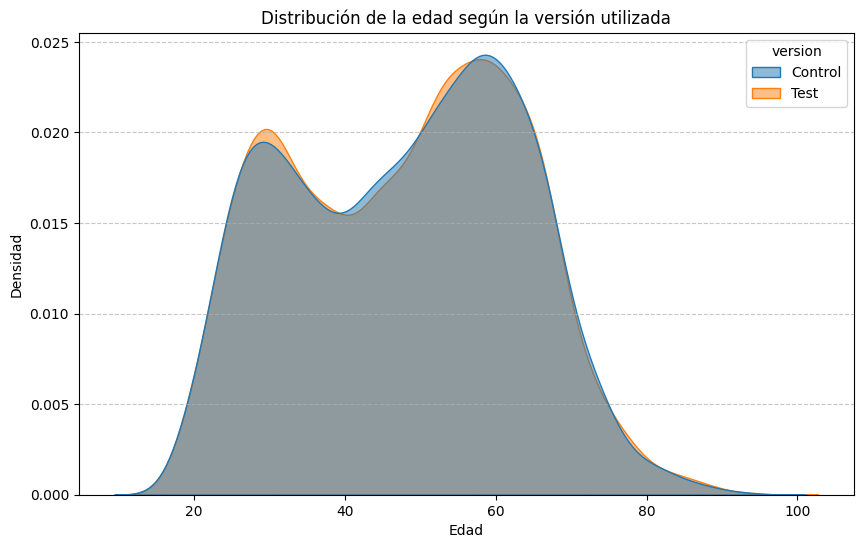

In [35]:
# Filtrar datos para usuarios con información de edad y versión
filtered_data = final_table.dropna(subset=['clnt_age', 'version'])

# Crear un gráfico de densidad para la distribución de edad según la versión
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=filtered_data,
    x='clnt_age',
    hue='version',
    fill=True,
    common_norm=False,
    alpha=0.5
)

# Personalizar el gráfico
plt.title('Distribución de la edad según la versión utilizada')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


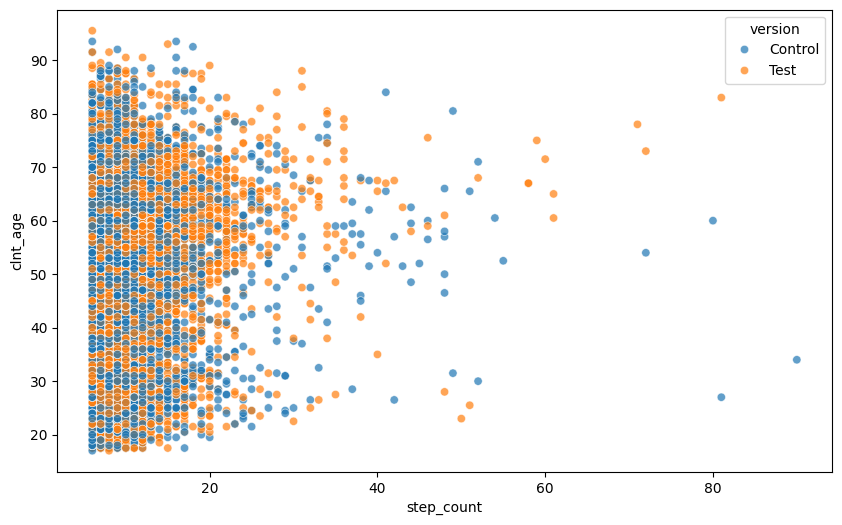

In [38]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=final_table,
    x='step_count',
    y='clnt_age',
    hue='version',
    alpha=0.7
)



# Mostrar el gráfico
plt.show()

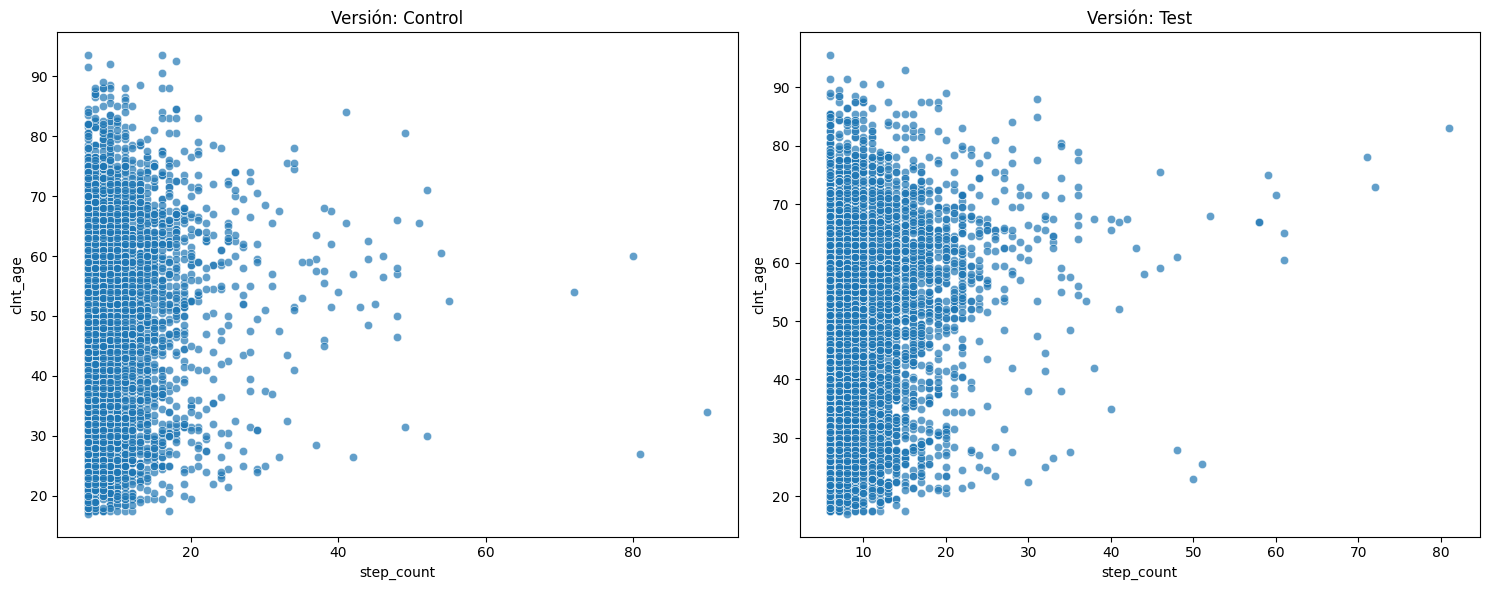

In [45]:
# Creo gráficos separados para cada versión
unique_versions = final_table['version'].dropna().unique()

plt.figure(figsize=(15, 6))

for i, version in enumerate(unique_versions, start=1):
    plt.subplot(1, len(unique_versions), i)
    sns.scatterplot(
        data=final_table[final_table['version'] == version],
        x='step_count',
        y='clnt_age',
        alpha=0.7
    )
    plt.title(f'Versión: {version}')
plt.tight_layout()
plt.show()